# **Emotion Recognition Based on Facial Expressions using Convolutional Neural Network**

## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

## 1 - Data preprocessing
### importing and preprocessing the train and test datasets

In [3]:
# download FER2013 data from kaggle
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'train',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'test',
    target_size = (48, 48),
    batch_size = 64, 
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
emotions = {0 : 'angry', 1 : 'disgusted', 2 : 'fearful', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprised'}

## 2 - Data visualization

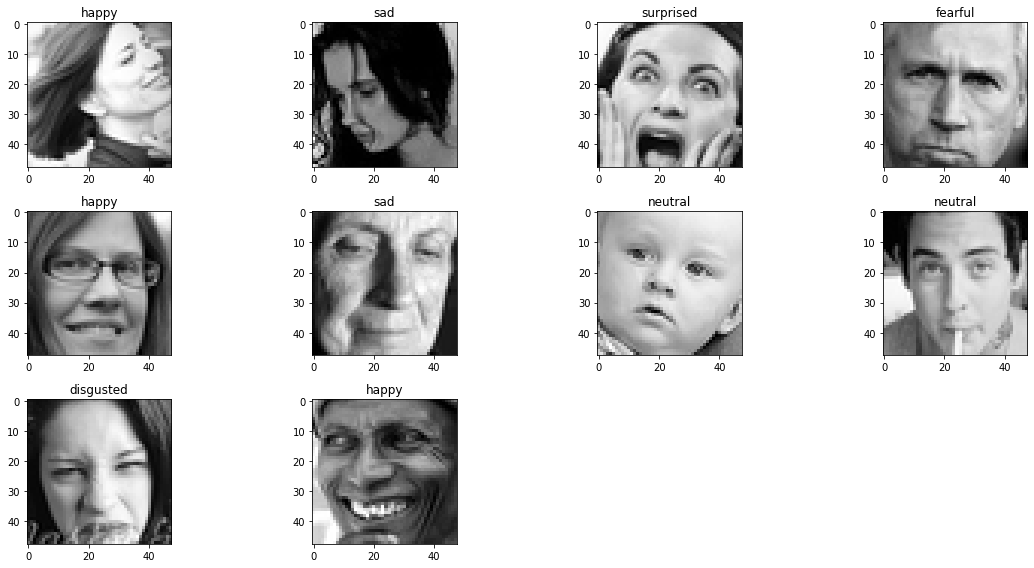

In [6]:
x_train = train_generator[0][0]
y_train = train_generator[0][1]

plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    for j, e in emotions.items() :
        if np.argmax(y_train[i]) == j :
            plt.title(e)
    plt.tight_layout()

## 3 -  making the model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [8]:
model.add(Flatten())
model.add(Dense(1280, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [10]:
# train the model
training_history = model.fit(
    train_generator,
    epochs = 8,
    steps_per_epoch = 448,
    validation_data = validation_generator,
    validation_steps = 112
)

Epoch 1/8
448/448 [==============================] - 504s 1s/step - loss: 1.7700 - accuracy: 0.2805 - val_loss: 1.6334 - val_accuracy: 0.3725
Epoch 2/8
448/448 [==============================] - 488s 1s/step - loss: 1.5783 - accuracy: 0.3922 - val_loss: 1.4905 - val_accuracy: 0.4312
Epoch 3/8
448/448 [==============================] - 469s 1s/step - loss: 1.4743 - accuracy: 0.4375 - val_loss: 1.4110 - val_accuracy: 0.4647
Epoch 4/8
448/448 [==============================] - 501s 1s/step - loss: 1.4042 - accuracy: 0.4663 - val_loss: 1.3685 - val_accuracy: 0.4781
Epoch 5/8
448/448 [==============================] - 425s 949ms/step - loss: 1.3448 - accuracy: 0.4926 - val_loss: 1.3272 - val_accuracy: 0.4880
Epoch 6/8
448/448 [==============================] - 350s 782ms/step - loss: 1.2905 - accuracy: 0.5147 - val_loss: 1.2858 - val_accuracy: 0.5127
Epoch 7/8
448/448 [==============================] - 1120s 3s/step - loss: 1.2492 - accuracy: 0.5256 - val_loss: 1.2382 - val_accuracy: 0.5297

### plotting the performance of the model

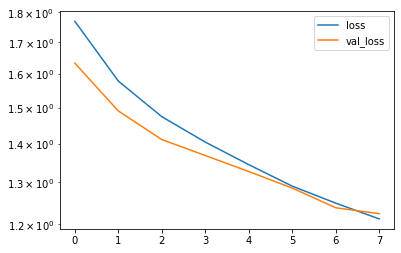

In [11]:
plt.semilogy(training_history.history['loss'])
plt.semilogy(training_history.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.show()

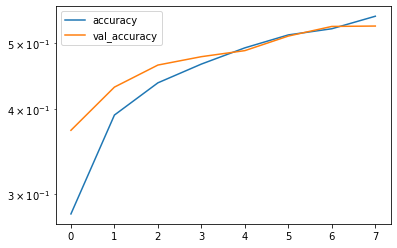

In [12]:
plt.semilogy(training_history.history['accuracy'])
plt.semilogy(training_history.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"])
plt.show()

#### evaluation the testset

In [13]:
val_loss, val_acc = model.evaluate(validation_generator)
val_loss, val_acc

113/113 [==============================] - 35s 309ms/step - loss: 1.2243 - accuracy: 0.5304


(1.2243077754974365, 0.5303705930709839)

## 4 - experiment the model

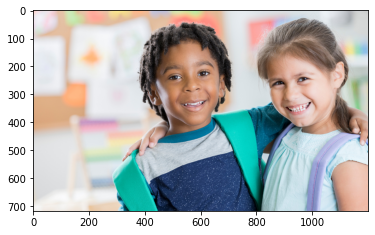

In [14]:
img = cv2.imread('image.jpg') # read the image we want to predict emotions faces from
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) # we need to used the cvtColor function to return the image to the original color 

In [15]:
# img = cv2.resize(img, (1281, 720))
face_cascad = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") # we need to use that file for classify just face of each person in the video or image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # this part use for 

In [16]:
faces = face_cascad.detectMultiScale(gray, 1.2, 5) # We use this function to find all faces in the image and return the coordinates of each face
# for draw a rectangle around faces
for (x, y, w, h) in faces : 
        cv2.rectangle(img, (x, y), (x+w, y+h+10), (255,0, 0), 4)

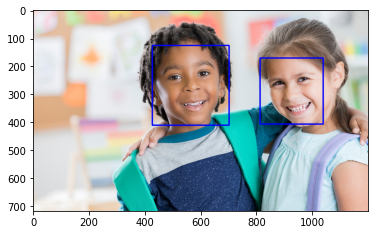

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [18]:
# transform the shape of the image to the shape of the input model
img_resized = np.expand_dims(np.expand_dims(cv2.resize(gray[y : y+h, x : x+w], (48, 48)), -1), 0) 
predictions = model.predict(img_resized)
pred = np.argmax(predictions) 

In [19]:
# and to write the emotion of persons besides the rectangle we drawn before we need to use the puttext function
cv2.putText(img, emotions[pred], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA) # font_size = 2, font_weight = 3

array([[[199, 205, 250],
        [196, 204, 251],
        [195, 205, 253],
        ...,
        [201, 202, 200],
        [202, 203, 201],
        [202, 203, 201]],

       [[200, 205, 250],
        [197, 205, 252],
        [197, 204, 253],
        ...,
        [202, 203, 201],
        [202, 203, 201],
        [202, 203, 201]],

       [[201, 206, 251],
        [199, 205, 252],
        [197, 205, 252],
        ...,
        [203, 204, 202],
        [203, 204, 202],
        [202, 203, 201]],

       ...,

       [[236, 241, 244],
        [236, 241, 244],
        [236, 241, 244],
        ...,
        [165, 186, 238],
        [166, 187, 239],
        [169, 189, 237]],

       [[235, 239, 244],
        [235, 239, 244],
        [235, 239, 244],
        ...,
        [165, 186, 238],
        [165, 186, 238],
        [170, 187, 236]],

       [[234, 239, 242],
        [233, 238, 241],
        [234, 239, 242],
        ...,
        [169, 187, 240],
        [169, 188, 239],
        [171, 189, 236]]

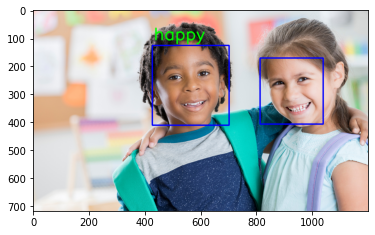

In [106]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [20]:
Capture = cv2.VideoCapture("The Pursuit Of Happyness- Job interview.mp4") # load the video we want to detect emotions from

In [22]:
while True : 
    r, img = Capture.read()
    if not r :
        break
    face_cascad = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detect faces
    faces = face_cascad.detectMultiScale(gray, 1.3, 5) # scalerFace = 1.3 , minNeighbors = 5 
    # drow a rectangle around faces and predict emotions
    for (x, y, w, h) in faces :
        cv2.rectangle(img, (x, y), (x+w, y+h+10), (0,0, 255), 4) # (x, y) is Vertex of the rectangle. and (x+w, y+h+10) is Vertex of the rectangle opposite to pt1
        cut_img = np.expand_dims(np.expand_dims(cv2.resize(gray[y : y+h, x : x+w], (48, 48)), -1), 0) # resize captures to shape (48, 48)
        # detection the emotion
        prediction = model.predict(cut_img)
        emotion = np.argmax(prediction)
        cv2.putText(img, emotions[emotion], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    cv2.imshow('emotion : ', img)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

Capture.release()
cv2.destroyAllWindows()    

KeyboardInterrupt: 